# Time Series Analysis - Seasonality & Spectral Analysis #

## Seasonality: China Manufacture Value add (Seasonal) ##

**In this example I would like to apply ARIMA model with Seasonality and Spectral Analysis in China's Manufacture Value add.**  
See https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython for reference.   
**The functions and methods can be apply to many other interesting cases with seasonality in Economics and Business analysis.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**1. Raw data downloaded from Wind®  Financial Terminal provided by PHBS**

**Data:**  
Seasonal nominal value add of industry sectors (manufacture) counted by purchasing power of CHY that time, converted to year, in hundred million CHY, from first season 1992 to second season 2020. 

**Finding:**  
By ploting the nominal value add of manufacture, we can see there is a clear geometric growth trend and seasonality. We consider using the ARIMA model with seasonality to model the fluctuation.

            China_value_add_manufacture
date                                   
1992-03-31                       2400.8
1992-06-30                       2799.1
1992-09-30                       3141.1
1992-12-31                       3384.0
1993-03-31                       3306.2
1993-06-30                       3938.2
1993-09-30                       4403.2
1993-12-31                       4825.1
1994-03-31                       4568.7
1994-06-30                       5459.1
1994-09-30                       5971.1
1994-12-31                       6453.6
1995-03-31                       5901.4
1995-06-30                       7036.2
1995-09-30                       7586.6
1995-12-31                       8152.5
1996-03-31                       7171.5
1996-06-30                       8219.9
1996-09-30                       8837.0
1996-12-31                       9598.9
1997-03-31                       8047.0
1997-06-30                       9207.9
1997-09-30                       9721.0


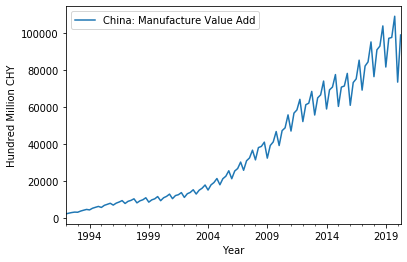

In [2]:
# Read data 
dataFile = 'data/China_manufacture_value_add_seasonal.xls'
data = pd.read_excel(dataFile, index_col = 'date')
print(data)

# Plot the row data
data.plot()
plt.xlabel('Year')
plt.ylabel('Hundred Million CHY')
plt.legend(['China: Manufacture Value Add'])
plt.show()

In [3]:
# Generate log differential GDP and add it into our data frame
data['log_value_add'] = data. China_value_add_manufacture.apply(lambda x: np.log(x))
data['log_value_add_diff'] = data.log_value_add.diff()
data

,China_value_add_manufacture,log_value_add,log_value_add_diff
date,,,
1992-03-31,2400.8,7.783557,NaN
1992-06-30,2799.1,7.937053,0.153496
1992-09-30,3141.1,8.052328,0.115275
1992-12-31,3384.0,8.126814,0.074485
1993-03-31,3306.2,8.103555,-0.023259
1993-06-30,3938.2,8.278479,0.174924
1993-09-30,4403.2,8.390087,0.111608
1993-12-31,4825.1,8.481587,0.091500
1994-03-31,4568.7,8.426984,-0.054603


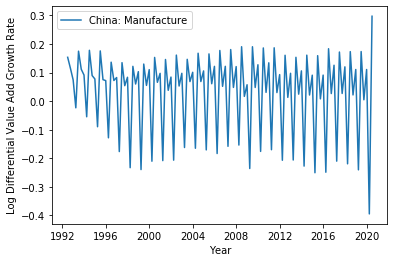

In [4]:
# Plot the log differential GDP series
plt.plot(data['log_value_add_diff'])
plt.xlabel('Year')
plt.ylabel('Log Differential Value Add Growth Rate')
plt.legend(['China: Manufacture'])
plt.show()

**2. Data Preprocessing: Abnormal Observation**

**Finding:**  
Due the influence of cov-2020 pandemic and its recovery in China, first and second seasons of 2020 witness a huge fluctuation in value add of manufacture. However, the shock is only about one third larger than the normal seasonal fluctuation, and it is not as large as our case of USA GDP. Thus, I decided **not** to drop the observations in 2020.


In [5]:
manufacture_growth = data.log_value_add_diff.dropna() # drop the first observation without data because of the differential
manufacture_growth.columns = ['manufacture_growth']
manufacture_growth

date
1992-06-30    0.153496
1992-09-30    0.115275
1992-12-31    0.074485
1993-03-31   -0.023259
1993-06-30    0.174924
1993-09-30    0.111608
1993-12-31    0.091500
1994-03-31   -0.054603
1994-06-30    0.178055
1994-09-30    0.089647
1994-12-31    0.077707
1995-03-31   -0.089449
1995-06-30    0.175879
1995-09-30    0.075315
1995-12-31    0.071941
1996-03-31   -0.128210
1996-06-30    0.136443
1996-09-30    0.072389
1996-12-31    0.082701
1997-03-31   -0.176349
1997-06-30    0.134762
1997-09-30    0.054227
1997-12-31    0.083637
1998-03-31   -0.232746
1998-06-30    0.121861
1998-09-30    0.060064
1998-12-31    0.103258
1999-03-31   -0.239345
1999-06-30    0.129836
1999-09-30    0.055234
                ...   
2013-03-31   -0.205911
2013-06-30    0.153520
2013-09-30    0.024545
2013-12-31    0.105983
2014-03-31   -0.227223
2014-06-30    0.161032
2014-09-30    0.021546
2014-12-31    0.090916
2015-03-31   -0.250448
2015-06-30    0.159235
2015-09-30    0.008095
2015-12-31    0.091196
2016-0

**3. Autocorrelation and Partial Autocorrelation**

**Findings:**  
  
We can clearly see seasonality in the autocorrelation function.

[ 1.         -0.54259531  0.18087572 -0.51379368  0.91623033 -0.51258061
  0.16676955 -0.50374371  0.87494678 -0.49831298  0.15559428 -0.49255029
  0.83890381 -0.47924566  0.14749111 -0.48278136  0.80360413 -0.46219611
  0.13514092 -0.46627399  0.75971297 -0.44429522  0.12608422 -0.44376096
  0.72002983 -0.42325054]
[ 1.         -0.54743991 -0.16500661 -0.73498338  0.84141588  0.24675017
 -0.02023017 -0.37877524  0.22669436  0.0456883  -0.02835101 -0.28023654
  0.1652812   0.11822801  0.05668572 -0.31668962  0.01651101  0.05406052
  0.00619421 -0.23405943 -0.15787178 -0.01098686  0.09869276  0.09883782
 -0.10847204 -0.11793539]


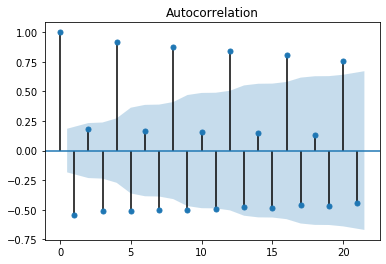

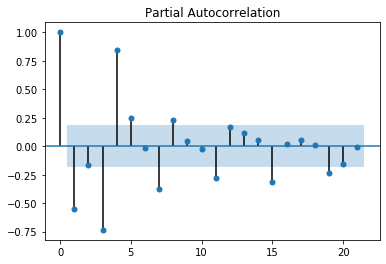

In [7]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import pacf

plot_acf(manufacture_growth)
plot_pacf(manufacture_growth)

print(acf(manufacture_growth, nlags = 25))
print(pacf(manufacture_growth, nlags = 25))


**4. Seasonal Decompose**

By using the seasonal_decompose function provided by statsmodels.tsa.seasonal toolbox, we can decompose the time series into trend, seasonal and residual series.

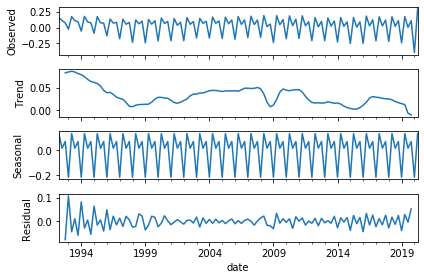

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

manufacture_growth_frame = pd.DataFrame(manufacture_growth)

decomposition = seasonal_decompose(manufacture_growth_frame, freq = 4)
decomposition.plot()

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid


**5. ARIMA model with Seasonality: Order Determination**  
  
See https://blog.csdn.net/weixin_38267719/article/details/100110317 for reference.  

**Finding:**  
According to the Bayesian Information Criterion（BIC）rule, the ARIMA(0, 0, 0)x(1, 0, 0, 4) model minimize the BIC.

In [35]:
import itertools
import warnings
import statsmodels.api as sm

p = q = range(0, 2) # maximum order for ar and ma are 3
d = range(0,2) # maximim order for differential is 2

pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 4) for x in list(itertools.product(p, d, q))]
warnings.filterwarnings("ignore") # ignore warning

# bic_list and model_para_list to record the BIC and model parameter
bic_list = []
model_para_list = []

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(manufacture_growth_frame,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()
            print(f'ARIMA{param}x{param_seasonal} - BIC:{results.bic}')
            
            bic_list.append(results.bic)
            model_para_list.append(f'ARIMA{param}x{param_seasonal}')
        
        except:
            continue


ARIMA(0, 0, 0)x(0, 0, 0, 4) - BIC:-109.92896250270223
ARIMA(0, 0, 0)x(0, 0, 1, 4) - BIC:-214.50575958753765
ARIMA(0, 0, 0)x(0, 1, 0, 4) - BIC:-452.05368408203793
ARIMA(0, 0, 0)x(0, 1, 1, 4) - BIC:-428.1465134334781
ARIMA(0, 0, 0)x(1, 0, 0, 4) - BIC:-454.0851564164295
ARIMA(0, 0, 0)x(1, 0, 1, 4) - BIC:-444.7744513529768
ARIMA(0, 0, 0)x(1, 1, 0, 4) - BIC:-433.31303839452903
ARIMA(0, 0, 0)x(1, 1, 1, 4) - BIC:-428.09564368297976
ARIMA(0, 0, 1)x(0, 0, 0, 4) - BIC:-130.74907651027092
ARIMA(0, 0, 1)x(0, 0, 1, 4) - BIC:-232.0256028785297
ARIMA(0, 0, 1)x(0, 1, 0, 4) - BIC:-442.25317989838476
ARIMA(0, 0, 1)x(0, 1, 1, 4) - BIC:-418.98216973285713
ARIMA(0, 0, 1)x(1, 0, 0, 4) - BIC:-450.0066227663912
ARIMA(0, 0, 1)x(1, 0, 1, 4) - BIC:-435.5374254993785
ARIMA(0, 0, 1)x(1, 1, 0, 4) - BIC:-428.7569363241722
ARIMA(0, 0, 1)x(1, 1, 1, 4) - BIC:-419.0065649867659
ARIMA(0, 1, 0)x(0, 0, 0, 4) - BIC:10.996752037287608
ARIMA(0, 1, 0)x(0, 0, 1, 4) - BIC:19.50088370490791
ARIMA(0, 1, 0)x(0, 1, 0, 4) - BIC:-385.

In [36]:
print(f'Model that minimize the BIC is {model_para_list[np.argmin(bic_list)]}')

Model that minimize the BIC is ARIMA(0, 0, 0)x(1, 0, 0, 4)


**6. Model Fitting and Forecast**

In [40]:
model = sm.tsa.statespace.SARIMAX(manufacture_growth_frame,
                                order=(0,0,0),
                                seasonal_order=(0, 1, 0, 4),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
result = model.fit()
result.summary()

[ 0.00486711  0.11083805 -0.39450327  0.29717912]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            Statespace Model Results                           
===============================================================================
Dep. Variable:      log_value_add_diff   No. Observations:                  113
Model:             SARIMAX(0, 1, 0, 4)   Log Likelihood                 228.368
Date:                 Fri, 14 Aug 2020   AIC                           -454.736
Time:                         16:24:52   BIC                           -452.054
Sample:                     06-30-1992   HQIC                          -453.648
                          - 06-30-2020                                         
Covariance Type:                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0009   4.96e-05     17.204      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       25.10   Jarque-Bera (JB):               363.20
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.07   Skew:                            -0.62
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.90
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [43]:
predict_sunspots = result.forecast(4) # one year forecast value
forecast = np.array(predict_sunspots[:]).reshape(-1)
forecast

array([ 0.00486711,  0.11083805, -0.39450327,  0.29717912])

**5. Spectral Analysis**

See https://github.com/AileenNielsen/TimeSeriesAnalysisWithPython/blob/master/8.%20Spectral%20Analysis.ipynb for reference.

In [45]:
def fourierExtrapolation(x, n_predict):
    n = x.size
    n_harm = 5                     # number of harmonics in model
    t = np.arange(0, n)
    p = np.polyfit(t, x, 1)         # find linear trend in x
    x_notrend = x - p[0] * t        # detrended x
    x_freqdom = fft.fft(x_notrend)  # detrended x in frequency domain
    f = fft.fftfreq(n)              # frequencies
    indexes = list(range(n))
    # sort indexes by frequency, lower -> higher
    indexes.sort(key = lambda i: np.absolute(f[i]))
 
    t = np.arange(0, n + n_predict)
    restored_sig = np.zeros(t.size)
    for i in indexes[:1 + n_harm * 2]:
        ampli = np.absolute(x_freqdom[i]) / n   # amplitude
        phase = np.angle(x_freqdom[i])          # phase
        restored_sig += ampli * np.cos(2 * np.pi * f[i] * t + phase)
    return restored_sig + p[0] * t

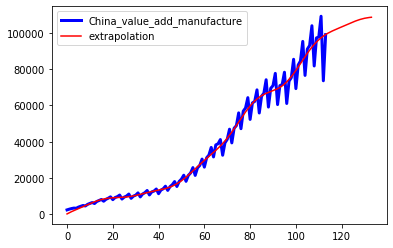

In [65]:
from numpy import fft

x = np.array(data['China_value_add_manufacture'].values)
n_predict = 20
extrapolation = fourierExtrapolation(x, n_predict)
plt.plot(np.arange(0, x.size), x, 'b', label = 'China_value_add_manufacture', linewidth = 3)
plt.plot(np.arange(0, extrapolation.size), extrapolation, 'r', label = 'extrapolation')
plt.legend()